# Tree-based methods 

In this lab, we'll consider the Pima Indians dataset, which primarly objective is to diagnostically predict whether female patients suffer from diabetes or not, based on a series of medical attributes. To this end, we'll be using several tree-based methods that were covered during the course lectures. 

Here are some info regarding the dataset's attributes :
  - Num_pregnant : The number of pregnancies the patient had. 
  - glucose_con : Patient's plasma glucsose concentration.
  - blood_pressure : Patient's dialostic blood pressure (mmHg).
  - triceps_thickness : Patient's triceps skin-fold thickness (mm).
  - insulin : Patient's 2-h serum insulin (mu U/mL).
  - bmi : Patient's body mass index (kg/m^2).
  - dpf : Patient's diabetes pedigree function.
  - age : Patient's age. 
  - diabetes : Whether the patient has diabetes (1) or not (0).

**Load the necessary libraries** 

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import math
from sklearn.pipeline import Pipeline 
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, BaggingClassifier, BaggingRegressor

**1) Load the dataset, get its general information, and check for missing values.** 

# Decision Trees

**2) Select 'diabetes' as the target variable, and all the remaining columns as predictors. Create a pipeline containing the preprocessing steps (missing values imputer, scaler,...) and a Decision Tree classifier, which maximum depth should be set to 3 (through the 'max_depth' argument). Set the entropy as the split criterion. Do you think scaling the variables is necessary ?**

**Fit this pipeline to the data (do not split the dataset for the time being), and plot the decision tree. How do you interpret it ?** 

**You'll need the 'plot_tree' class from the sklearn library. You can access the pipeline's classifier using the 'named_steps['classifier']' attributes.**

**3) Let's see how the model's performance evolve as a function of the tree's maximum depth.**

**To this end, split the dataset into a training and a test set following a 0.8/0.2 partition. Then, for maximum depths varying from 1 to 20, fit a Decision Tree classifier to the *training* data using a 10 folds cross-validation with the AUROC as metric. Plot the the means of the training and validation AUROCS across each folds as a function of the maximum depth. Also, compute the standard error of the means at each depth, and add it to the plot as shaded grey area around the means (cfr. plot below) . What can you conclude regarding the model's performance, as well as the uncertainty for the in-sample and out-of-sample AUROC estimates ?**

**Identify which depth would lead a priori to the best model's out-of-sample performance. Using this depth, fit a decision tree to the training split and report the training AUROC and the test AUROC.** 

<function matplotlib.pyplot.show>

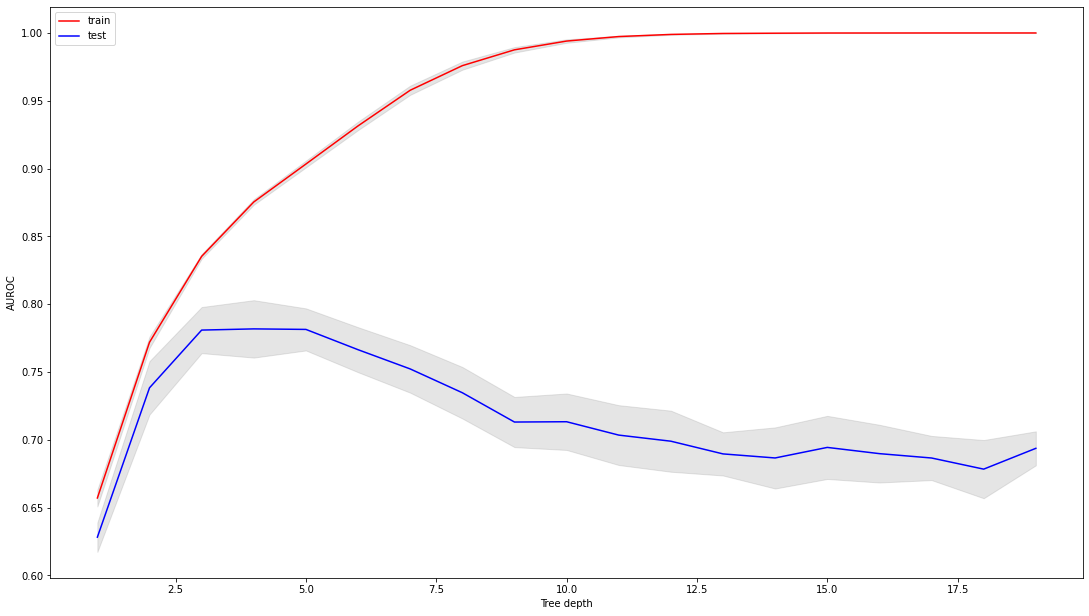

Clearly, the decision tree starts overfitting very early as the maximum depth increases, shown by the increasing gap between the training and validation curves. 

As observed, the standard error on the training AUROC is much less than the standard error on the validation AUROC, wathever the depth. This is expected as the training AUROC in each fold is computed using 10 times as much data points as the validation AUROC, resulting in a lower variance in the training AUROC across each folds, and hence, in a lower standard error compared to the validation AUROC's standard error. Furthermore, as the depth increases, the model begins to interpolate the training data in each fold, and correctly predicts each training point with probability 1. As the AUROC is equal to 1 in each training fold, the standard error is equal to 0, as observed starting from approximately depth 13.

On the other hand, the standard error of the validation AUROC remains approximately constant throughout the different depths. 

# Bagging 

**4) Implement your own bagging algorithm by fitting a decision tree to each bootstrap sample. The bootstramp samples should be drawn from and of equal size as the training set. Set the the number of bootstrap samples to 30 and the maximum_depth of each decision as the optimum depth found above.**

**Then using the decision trees fitted on each bootsrapped training data, predict on the test set and use the majority vote strategy to get the final predictions. Redo the same by averaging the trees probabilities. Display the confusion matrix for the test set.**



# Random Forest

**5) Perform a random search on a specified grid of hyper-parameters to find the best hyper-parameters configuration for a RandomForestClassifier. Set the scoring function as the AUROC and limit the number of combination to try to 10.**

**Fit the best model found in the previous procedure to the training data, and predict on the test set. Report the test AUROC and display the ROC curve.**

# Boosting

**7) Fit a boosting classifier to the training data, and report the training and test AUROC's. You can use the GradientBoostingClassifier from the sklearn library.**

**8) For a decision tree classifier, a bagging classifier, a random forest classifier and a boosting classifier, perform a random search on a predifined grid of hyper-parameters. Amongst all models and hyper-parameters combinations, select the best model and report the best *validation* AUROC. The random search should be performed on the *training* data, and you can set the number of combinations to try per model to 5.**

**For the best model found, report the training and test AUROC's, and display the training and test ROC curves**

# Regression 

**9) Select 'bmi' as the target variable and all the remaining columns in the dataframe as the predictors. Split your dataset into a training and test set, fit a decision tree regressor to the training data, and report the MSE on the training and test sets. What do you observe ?**

As we did not impose any restrictions on the depth that the tree could reach, it grew to the point that each leaf contains a single training observation. The value predicted for a leaf being the mean of the observations contained in it, and as each leaf contains a single observation, the model exactly predicts all training points, and the MSE is null. The behaviour obviously does not generalize well, as shown by the test MSE. 

**10) For a decision tree regressor, a bagging regressor, a random forest regressor and a boosting regressor, perform a random search on a predifined grid of hyper-parameters. Amongst all models and hyper-parameters combinations, select the best model and report the best *validation* MSE. The random search should be performed on the *training* data, and you can set the number of combinations to try per model to 5.**

**For the best model found, report the training and test MSE.**